# Prediction algorithms

This notebook is to analyse the energy data and come up with more conclusion

In [1]:
#Importing Libraries
import matplotlib.pyplot as plt
import pandas as pd
import time
import numpy as np
import seaborn as sns
import datetime
import math


from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

%matplotlib inline

### Load Data

In [2]:
data= pd.read_csv("./Dataset/new_data_feature.csv")

In [3]:
data.head()

,date,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,...,rv1,rv2,date_time,dayoftheweek,WeekDayType,timeofDay,activeStatus,NSM,weekOfTheYear,season
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11 17:00:00,Monday,Weekday,Day,awake,61200,2,winter
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11 17:10:00,Monday,Weekday,Day,awake,61800,2,winter
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11 17:20:00,Monday,Weekday,Day,awake,62400,2,winter
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11 17:30:00,Monday,Weekday,Day,awake,63000,2,winter
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11 17:40:00,Monday,Weekday,Day,awake,63600,2,winter


<h6>Variable Description<br />
====================</h6>

<ul>
	<li>date time year-month-day hour:minute:second&nbsp;</li>
	<li>Appliances, energy use in Wh</li>
	<li>lights, energy use of light fixtures in the house in Wh</li>
	<li>T1, Temperature in kitchen area, in Celsius</li>
	<li>RH_1, Humidity in kitchen area, in %</li>
	<li>T2, Temperature in living room area, in Celsius</li>
	<li>RH_2, Humidity in living room area, in %</li>
	<li>T3, Temperature in laundry room area</li>
	<li>RH_3, Humidity in laundry room area, in %</li>
	<li>T4, Temperature in office room, in Celsius</li>
	<li>RH_4, Humidity in office room, in %</li>
	<li>T5, Temperature in bathroom, in Celsius</li>
	<li>RH_5, Humidity in bathroom, in %</li>
	<li>T6, Temperature outside the building (north side), in Celsius</li>
	<li>RH_6, Humidity outside the building (north side), in %</li>
	<li>T7, Temperature in ironing room , in Celsius</li>
	<li>RH_7, Humidity in ironing room, in %</li>
	<li>T8, Temperature in teenager room 2, in Celsius</li>
	<li>RH_8, Humidity in teenager room 2, in %</li>
	<li>T9, Temperature in parents room, in Celsius</li>
	<li>RH_9, Humidity in parents room, in %</li>
	<li>To, Temperature outside (from Chi&egrave;vres weather station), in Celsius</li>
	<li>Pressure (from Chi&egrave;vres weather station), in mm Hg</li>
	<li>RH_out, Humidity outside (from Chi&egrave;vres weather station), in %</li>
	<li>Windspeed (from Chi&egrave;vres weather station), in m/s</li>
	<li>Visibility (from Chi&egrave;vres weather station), in km</li>
	<li>Tdewpoint (from Chi&egrave;vres weather station), &deg;C</li>
	<li>rv1, Random variable 1, nondimensional</li>
	<li>rv2, Rnadom variable 2, nondimensional</li>
</ul>

<p>Where indicated, data from the nearest airport weather station (Chi&egrave;vres Airport, Belgium) was downloaded from a public data set from&nbsp;</p>

<p>Reliable Prognosis, rp5.ru. Permission was obtained from Reliable Prognosis for the distribution of the 4 months of data.<br />
&nbsp;</p>


In [4]:
data.shape

(19735, 37)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 37 columns):
date             19735 non-null object
Appliances       19735 non-null int64
lights           19735 non-null int64
T1               19735 non-null float64
RH_1             19735 non-null float64
T2               19735 non-null float64
RH_2             19735 non-null float64
T3               19735 non-null float64
RH_3             19735 non-null float64
T4               19735 non-null float64
RH_4             19735 non-null float64
T5               19735 non-null float64
RH_5             19735 non-null float64
T6               19735 non-null float64
RH_6             19735 non-null float64
T7               19735 non-null float64
RH_7             19735 non-null float64
T8               19735 non-null float64
RH_8             19735 non-null float64
T9               19735 non-null float64
RH_9             19735 non-null float64
T_out            19735 non-null float64
Press_mm_hg     

In [6]:
data.isnull().sum()

date             0
Appliances       0
lights           0
T1               0
RH_1             0
T2               0
RH_2             0
T3               0
RH_3             0
T4               0
RH_4             0
T5               0
RH_5             0
T6               0
RH_6             0
T7               0
RH_7             0
T8               0
RH_8             0
T9               0
RH_9             0
T_out            0
Press_mm_hg      0
RH_out           0
Windspeed        0
Visibility       0
Tdewpoint        0
rv1              0
rv2              0
date_time        0
dayoftheweek     0
WeekDayType      0
timeofDay        0
activeStatus     0
NSM              0
weekOfTheYear    0
season           0
dtype: int64

We can conclud that there is no missing values here.

In [7]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


In [8]:
data = pd.get_dummies(data, columns=["timeofDay","activeStatus",'dayoftheweek','WeekDayType','season'])

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


## Libraries, Functions and Variables to Evaluate model

In [10]:
#Importing Libraries
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from sklearn.cross_validation import cross_val_score


rmse_dict = {}    
def rmse(correct,estimated):
    rmse_val = np.sqrt(mean_squared_error(correct,estimated)) 
    return rmse_val

# Generating the Table Frame for metrics
evluation_table = pd.DataFrame({  'Model_desc':[],
                        'Model_param':[],
                        'r2_train': [],
                        'r2_test': [],
                        'rms_train':[], 
                        'rms_test': [],
                        'mae_train': [],
                        'mae_test': [],
                        'mape_train':[],
                        'mape_test':[],
                        'cross_val_score' : []})


# Evaluating the model
def evaluate_model(model, model_desc,model_param, X_train, y_train, X_test, y_test):
    global evluation_table
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
        
    
    try:
        r2_train = r2_score(y_train, y_train_pred)
        r2_test = r2_score(y_test, y_test_pred)
    except:
        r2_train = "not calculated"
        r2_test = "not calculated"
    try:
        rms_train = rmse(y_train, y_train_pred)
        rms_test = rmse(y_test, y_test_pred)
    except:
        rms_train = "not calculated"
        rms_test = "not calculated"
    try:
        mae_train = mean_absolute_error(y_train, y_train_pred)
        mae_test = mean_absolute_error(y_test, y_test_pred)
    except:
        mae_train = "not calculated"
        mae_test = "not calculated"
    try:
        mape_train = np.mean(np.abs((y_train - y_train_pred) / y_train)) * 100
        mape_test = np.mean(np.abs((y_test - y_test_pred) / y_test)) * 100
    except:
        mape_train = "not calculated"
        mape_test = "not calculated"
    
    
#     try:
#         cv_score = cross_val_score(model, X_train, y_train, cv=10)
#         cv_score = cv_score.mean()
#     except:
#         cv_score = "Not calulated"
        
    model_param = pd.DataFrame({'Model_desc':[model_desc],
                            'Model_param':[model_param],
                            'r2_train': [r2_train],
                            'r2_test': [r2_test],
                            'rms_train':[rms_train], 
                            'rms_test': [rms_test],
                            'mae_train': [mae_train],
                            'mae_test': [mae_test],
                            'mape_train':[mape_train],
                            'mape_test':[mape_test],
                            'cross_val_score' : "Not Calculated"})

    evluation_table = evluation_table.append([model_param])
 
    return evluation_table

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


### Linear Regression

In [11]:
from sklearn.model_selection import train_test_split
from sklearn import linear_model

In [12]:
#Select response y and Training set X
k = list(data)
k
my_cols = [
 'lights',
 'T1',
 'RH_1',
 'T2',
 'RH_2',
 'T3',
 'RH_3',
 'T4',
 'RH_4',
 'T5',
 'RH_5',
 'T6',
 'RH_6',
 'T7',
 'RH_7',
 'T8',
 'RH_8',
 'T9',
 'RH_9',
 'T_out',
 'Press_mm_hg',
 'RH_out',
 'Windspeed',
 'Visibility',
 'Tdewpoint',
 'NSM',
 'weekOfTheYear',
 'timeofDay_Day',
 'timeofDay_Night',
 'activeStatus_awake',
 'activeStatus_sleep',
 'dayoftheweek_Friday',
 'dayoftheweek_Monday',
 'dayoftheweek_Saturday',
 'dayoftheweek_Sunday',
 'dayoftheweek_Thurday',
 'dayoftheweek_Tuesday',
 'dayoftheweek_Wednesday',
 'WeekDayType_Weekday',
 'WeekDayType_weekend',
 'season_spring',
 'season_winter']
X = data[my_cols].values
y = data['Appliances']

In [13]:
#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)

In [14]:
lm = linear_model.LinearRegression()
linear = lm.fit(X_train, y_train)

In [15]:
evaluate_model(linear, "LinearRegression",linear,X_train,y_train, X_test , y_test)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.652823,58.783411,0.198272,0.212148,89.242663,91.827023


### Multiple Linear Regression

In [16]:
import statsmodels.api as sm

C:\Users\Nikesh\Anaconda3\envs\ADS_Assign2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [17]:
from pandas.core import datetools

#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']
X = data[my_cols]
y = data['Appliances']

In [18]:
# Building the optimal model 
import statsmodels.formula.api as sm
#X = X.value
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Appliances   R-squared:                       0.210
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     145.1
Date:                Fri, 16 Mar 2018   Prob (F-statistic):               0.00
Time:                        20:31:28   Log-Likelihood:            -1.1706e+05
No. Observations:               19735   AIC:                         2.342e+05
Df Residuals:                   19698   BIC:                         2.345e+05
Df Model:                          36                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1             1.7462      0.094     18.511      0.000       1.561       1.931
x2             4.7267      1.916      2.466      0.014       0.970       8.483
x3            12.0105      0.683     17.586      0.000      10.672      13.349
x4           -21.8689      1.610    -13.582      0.000     -25.025     -18.713
x5           -13.0846      0.762    -17.175      0.000     -14.578     -11.591
x6            24.0234      1.088     22.090      0.000      21.892      26.155
x7             7.5056      0.689     10.888      0.000       6.154       8.857
x8            -0.8593      1.055     -0.815      0.415      -2.927       1.208
x9            -2.4040      0.639     -3.759      0.000      -3.657      -1.151
x10           -0.4272      1.176     -0.363      0.716      -2.733       1.878
x11            0.0811      0.086      0.939      0.348      -0.088       0.250
x12            2.1878      0.680      3.217      0.001       0.855       3.521
x13           -0.1903      0.080     -2.390      0.017      -0.346      -0.034
x14            3.0506      1.308      2.332      0.020       0.486       5.615
x15           -1.3978      0.430     -3.252      0.001      -2.240      -0.555
x16            9.0849      0.996      9.120      0.000       7.132      11.037
x17           -1.3936      0.400     -3.480      0.001      -2.178      -0.609
x18          -15.3987      1.864     -8.262      0.000     -19.052     -11.746
x19           -0.1147      0.442     -0.260      0.795      -0.981       0.752
x20           -2.4207      1.544     -1.568      0.117      -5.446       0.605
x21            0.1876      0.105      1.784      0.074      -0.018       0.394
x22            0.5522      0.318      1.735      0.083      -0.072       1.176
x23            1.2973      0.345      3.757      0.000       0.621       1.974
x24            0.1375      0.057      2.431      0.015       0.027       0.248
x25            0.9414      1.460      0.645      0.519      -1.920       3.803
x26         8.911e-06   3.92e-05      0.227      0.820    -6.8e-05    8.58e-05
x27           -1.6728      0.479     -3.493      0.000      -2.612      -0.734
x28          -54.2819     21.602     -2.513      0.012     -96.624     -11.939
x29          -64.0214     21.631     -2.960      0.003    -106.420     -21.623
x30          -32.0322     21.571     -1.485      0.138     -74.313      10.248
x31          -86.2711     21.677     -3.980      0.000    -128.759     -43.783
x32           -2.0124      5.035     -0.400      0.689     -11.881       7.856
x33           -7.1199      5.120     -1.391      0.164     -17.155       2.915
x34          -15.6129      9.603     -1.626      0.104     -34.435       3.209
x35          -35.0456      9.801     -3.576      0.000     -54.256     -15.835
x36          -18.4794      4.974     -3.715      0.000     -28.229      -8.729
x3

In [19]:
X.shape

(19735, 42)

## Decision Tree Classifier

#Select response y and Training set X
my_cols = ['lights', 'T1', 'RH_1', 'T2', 'RH_2', 'T3', 'RH_3', 'T4', 'RH_4', 'T5', 'RH_5', 'T6', 'RH_6', 'T7', 'RH_7', 'T8',
       'RH_8', 'T9', 'RH_9', 'T_out', 'Press_mm_hg', 'RH_out', 'Windspeed',
       'Visibility', 'Tdewpoint', 'rv1', 'rv2', 'NSM']
X = data[my_cols]
y = data['Appliances']

In [20]:
from sklearn import tree
cltree = tree.DecisionTreeClassifier()


In [21]:

X = data[my_cols]
y = data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
dtc = cltree.fit(X_train, y_train)

In [22]:
evaluate_model(dtc, "DecisionTreeClassifier",dtc,X_train,y_train, X_test , y_test)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.652823,58.783411,0.198272,0.212148,89.242663,91.827023
0,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",Not Calculated,37.081475,0.000000,34.213705,0.000000,0.173300,1.000000,90.621866,0.000000


### RandomForest

In [23]:
from sklearn.ensemble import RandomForestClassifier

In [24]:
#splitting dataset into training and Test set
from sklearn.model_selection import train_test_split
X = data[my_cols]
y = data['Appliances']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
dtc = cltree.fit(X_train, y_train)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [25]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [27]:
#Fitting Random Forest Classification to the Training set
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier(n_estimators = 300, criterion = 'entropy',  random_state=0, max_features=11 )
classifier.fit(X_train, y_train)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=None, max_features=11, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=300, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
evaluate_model(classifier, "RandomForestClassifier",classifier,X_train,y_train, X_test , y_test)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.652823,58.783411,0.198272,0.212148,89.242663,91.827023
0,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",Not Calculated,37.081475,0.000000,34.213705,0.000000,0.173300,1.000000,90.621866,0.000000
0,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",Not Calculated,30.766113,0.000000,27.142378,0.000000,0.417652,1.000000,77.950282,0.000000


### XG Boost

In [29]:
import xgboost as xgb
from xgboost import XGBClassifier

In [30]:
#splitting dataset into training and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)

In [31]:
#fit model on training data
XGB = XGBClassifier()
XGB.fit(X_train, y_train)

XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=1,
       gamma=0, learning_rate=0.1, max_delta_step=0, max_depth=3,
       min_child_weight=1, missing=None, n_estimators=100, nthread=-1,
       objective='multi:softprob', reg_alpha=0, reg_lambda=1,
       scale_pos_weight=1, seed=0, silent=True, subsample=1)

In [32]:
evaluate_model(XGB, "XGBClassifier",XGB,X_train,y_train, X_test , y_test)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.652823,58.783411,0.198272,0.212148,89.242663,91.827023
0,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",Not Calculated,37.081475,0.000000,34.213705,0.000000,0.173300,1.000000,90.621866,0.000000
0,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",Not Calculated,30.766113,0.000000,27.142378,0.000000,0.417652,1.000000,77.950282,0.000000
0,XGBClassifier,"XGBClassifier(base_score=0.5, colsample_byleve...",Not Calculated,40.287799,31.518141,27.446178,23.483870,0.065761,0.357640,100.244937,81.848204


## Gradient Boosting Model

In [33]:
# Gradient Boosting Model

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.preprocessing import MinMaxScaler


In [34]:
X = data[my_cols]
y = data['Appliances']
min_max_scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.75, test_size = 0.25)
Classifier = GradientBoostingClassifier(n_estimators = 25, random_state = 0, max_features = 3, verbose = 1)
Classifier.fit(X_train, y_train)

      Iter       Train Loss   Remaining Time 
         1       50457.3220            1.38m
         2       47139.3352            1.22m
         3       44678.3549            1.17m
         4       42829.2458            1.09m
         5       41241.6705            1.03m
         6       39947.8425           58.25s
         7       38885.3577           55.90s
         8       37911.2849           52.02s
         9       37083.7757           48.27s
        10       36360.1123           44.83s
        20       31809.7822           14.07s


GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=3, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=25,
              presort='auto', random_state=0, subsample=1.0, verbose=1,
              warm_start=False)

In [35]:
evaluate_model(Classifier, "GradientBoostingClassifier",Classifier,X_train,y_train, X_test , y_test)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.652823,58.783411,0.198272,0.212148,89.242663,91.827023
0,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",Not Calculated,37.081475,0.000000,34.213705,0.000000,0.173300,1.000000,90.621866,0.000000
0,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",Not Calculated,30.766113,0.000000,27.142378,0.000000,0.417652,1.000000,77.950282,0.000000
0,XGBClassifier,"XGBClassifier(base_score=0.5, colsample_byleve...",Not Calculated,40.287799,31.518141,27.446178,23.483870,0.065761,0.357640,100.244937,81.848204
0,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,Not Calculated,45.717471,31.090467,37.736659,27.626106,-0.227463,0.430312,110.057011,78.159051


## K Means

In [36]:
from sklearn.cluster import KMeans

In [37]:
X = data[my_cols]
y = data['Appliances']
# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# y = min_max_scaler.fit_transform(y.reshape(1, -1))
X_train, X_test, y_train, y_test = train_test_split(X, y,train_size=0.75, test_size=0.25)
classifier = KMeans(n_clusters=2, n_jobs=-1, verbose=1 )
classifier.fit(X_train, y_train)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=2, n_init=10, n_jobs=-1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=1)

In [38]:
evaluate_model(classifier, "Kmeans",classifier,X_train,y_train, X_test , y_test)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.652823,58.783411,0.198272,0.212148,89.242663,91.827023
0,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",Not Calculated,37.081475,0.000000,34.213705,0.000000,0.173300,1.000000,90.621866,0.000000
0,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",Not Calculated,30.766113,0.000000,27.142378,0.000000,0.417652,1.000000,77.950282,0.000000
0,XGBClassifier,"XGBClassifier(base_score=0.5, colsample_byleve...",Not Calculated,40.287799,31.518141,27.446178,23.483870,0.065761,0.357640,100.244937,81.848204
0,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,Not Calculated,45.717471,31.090467,37.736659,27.626106,-0.227463,0.430312,110.057011,78.159051
0,Kmeans,"KMeans(algorithm='auto', copy_x=True, init='k-...",Not Calculated,98.484799,96.765219,99.061445,99.051667,-0.895385,-0.902851,143.443229,140.642382


## Keras Tensorflow

In [43]:

from math import sqrt
from numpy import concatenate
from matplotlib import pyplot
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import mean_squared_error
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [44]:
X = data[my_cols].values
y = data['Appliances']
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# split into train and test sets
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 0)


# reshape input to be 3D [samples, timesteps, features]


train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(14801, 1, 42) (14801,) (4934, 1, 42) (4934,)


Train on 14801 samples, validate on 4934 samples
Epoch 1/10
 - 3s - loss: 66.1553 - val_loss: 53.2289
Epoch 2/10
 - 3s - loss: 48.5929 - val_loss: 48.3575
Epoch 3/10
 - 3s - loss: 45.2103 - val_loss: 46.4722
Epoch 4/10
 - 3s - loss: 43.7178 - val_loss: 45.4187
Epoch 5/10
 - 3s - loss: 42.6021 - val_loss: 44.6605
Epoch 6/10
 - 3s - loss: 41.9443 - val_loss: 44.2817
Epoch 7/10
 - 3s - loss: 41.6200 - val_loss: 44.0217
Epoch 8/10
 - 3s - loss: 41.3953 - val_loss: 43.8462
Epoch 9/10
 - 3s - loss: 41.2238 - val_loss: 43.6977
Epoch 10/10
 - 3s - loss: 41.0759 - val_loss: 43.5735


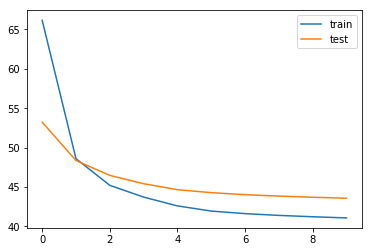

In [45]:
# design network
model = Sequential()
model.add(LSTM(50, input_shape=(train_X.shape[1], train_X.shape[2])))
model.add(Dense(1))
model.compile(loss='mae', optimizer='adam')
# fit network
history = model.fit(train_X, train_y, epochs=10, batch_size=12, validation_data=(test_X, test_y), verbose=2, shuffle=False)
# plot history
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [46]:
yhat = model.predict(test_X)
yhat
rmse = sqrt(mean_squared_error(test_y, yhat))
print('Test RMSE: %.3f' % rmse)
r2_score(test_y, yhat)

Test RMSE: 104.293


0.035160384239292686

In [ ]:
evaluate_model(model, "Keras-LSTM",model,train_X,train_y, test_X , test_y)

,Model_desc,Model_param,cross_val_score,mae_test,mae_train,mape_test,mape_train,r2_test,r2_train,rms_test,rms_train
0,LinearRegression,"LinearRegression(copy_X=True, fit_intercept=Tr...",Not Calculated,51.942311,51.777792,61.6528,58.7834,0.198272,0.212148,89.2427,91.827
0,DecisionTreeClassifier,"DecisionTreeClassifier(class_weight=None, crit...",Not Calculated,37.081475,0.000000,34.2137,0,0.173300,1.000000,90.6219,0
0,RandomForestClassifier,"(DecisionTreeClassifier(class_weight=None, cri...",Not Calculated,30.766113,0.000000,27.1424,0,0.417652,1.000000,77.9503,0
0,XGBClassifier,"XGBClassifier(base_score=0.5, colsample_byleve...",Not Calculated,40.287799,31.518141,27.4462,23.4839,0.065761,0.357640,100.245,81.8482
0,GradientBoostingClassifier,([DecisionTreeRegressor(criterion='friedman_ms...,Not Calculated,45.717471,31.090467,37.7367,27.6261,-0.227463,0.430312,110.057,78.1591
0,Kmeans,"KMeans(algorithm='auto', copy_x=True, init='k-...",Not Calculated,98.484799,96.765219,99.0614,99.0517,-0.895385,-0.902851,143.443,140.642
0,Keras-LSTM,<keras.models.Sequential object at 0x00000149A...,Not Calculated,43.573487,41.022321,not calculated,not calculated,0.035160,0.057201,not calculated,not calculated


## Gradient Boosting Regressor

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor  
from sklearn.cross_validation import LeaveOneLabelOut
from sklearn.grid_search import GridSearchCV
import operator
from math import sqrt

In [ ]:
gbr=GradientBoostingRegressor(n_estimators= 300,learning_rate = 1.0, max_features= 'sqrt') 

# min_max_scaler = MinMaxScaler()
# X = min_max_scaler.fit_transform(X)
# split into train and test sets


train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.25, random_state = 0)

gbr.fit(train_X, train_y)
y_pred=gbr.predict(test_X) 

print ("R-squared for Train: %.2f" %gbr.score(train_X, train_y))
print ("R-squared for Test: %.2f" %gbr.score(test_X, test_y))

In [ ]:
def GB(param_grid): 
    estimator = GradientBoostingRegressor()
    cv = LeaveOneLabelOut(train_X.shape)
    classifier = GridSearchCV(estimator=estimator, cv=cv, param_grid=param_grid, n_jobs=-1) 
    classifier.fit(train_X, train_y)
    classifier.best_estimator_ 
    return classifier.best_estimator_

In [ ]:
param={'n_estimators':[300], 
            'learning_rate': [0.1],
            'max_depth':[6], 
            'min_samples_leaf':[5],
            'max_features':[1.0]
           } 
estimation=GB(param)

In [ ]:
evaluate_model(estimation, "GradientBoostingRegressor",estimation,train_X,train_y, test_X , test_y)

## Logistic Regression

In [ ]:
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC



In [ ]:
validation_size = 0.20
min_max_scaler = MinMaxScaler()
X = min_max_scaler.fit_transform(X)
# split into train and test sets
X = X.values
y = data['Appliances']
seed = 7
X_train, X_validation, Y_train, Y_validation = model_selection.train_test_split(X, y, test_size=validation_size, random_state=seed)

In [ ]:
seed = 2
scoring = 'accuracy'

In [ ]:
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
# models.append(('SVM', SVC()))
# evaluate each model in turn
results = []
names = []
for name, model in models:
    kfold = model_selection.KFold(n_splits=2, random_state=seed)
    cv_results = model_selection.cross_val_score(model, X_train, Y_train, cv=kfold, scoring='r2')
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

In [ ]:
# Compare Algorithms
fig = plt.figure(figsize=(20,10))
fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()